In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from numpy import transpose as t
import rpy2.robjects.numpy2ri


In [2]:
# REQUIRED
rpy2.robjects.numpy2ri.activate()

# this assumes means only contains observations
def change_point(means) :
  # opt index
  ind = 3

  ecp = importr('ecp')
  e_agglo = robjects.r['e.agglo']
  output = e_agglo(means)
  return np.array(output[ind])

In [8]:
# import flow cytometry data directly from myria
fileURL1 = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-particle_stats_byfile/data?format=csv'
result = pd.read_csv(fileURL1)

# load in the SDS data so that we can look at clusters in T/S space and "real" space
# also want to get seasons/months of year for each file
fileURL2 = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-all_sds_v2/data?format=csv'
sds = pd.read_csv(fileURL2)
sds.rename(columns={'file': 'File_Id', 'day': 'Day'}, inplace=True)


# pick a cruise
cr = 'Thompson_10'

# join sds dataframe to cluster results
new_table = pd.merge(sds, result, how="inner")
subset = new_table[(new_table['Cruise']==cr)].sort(['Day','File_Id'],ascending=[1,1])

# select the subset of variables to cluster over
#X = new_table[['fsc_avg','chl_avg','pe_avg','fsc_var','chl_var','pe_var']].values  
X = subset[['fsc_avg','chl_avg','pe_avg']].values 
Y = subset[['T','S']]

In [4]:
xx = change_point(X[0:700,:])
yy = change_point(Y[0:700,:])

In [5]:
print xx
print yy

[   1.  112.  152.  276.  390.  431.  515.  561.  701.]


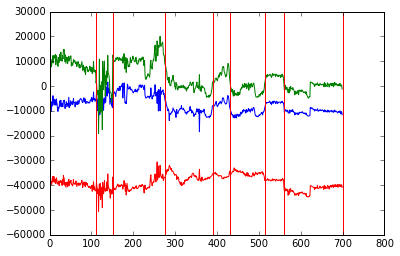

In [7]:
# plot the fcm and sfl data with the changepoints indicated

plt.plot(X[0:700,0])
plt.plot(X[0:700,1])
plt.plot(X[0:700,2])
plt.axvline(xx[1],color='r')
plt.axvline(xx[2],color='r')
plt.axvline(xx[3],color='r')
plt.axvline(xx[4],color='r')
plt.axvline(xx[5],color='r')
plt.axvline(xx[6],color='r')
plt.axvline(xx[7],color='r')
plt.axvline(xx[8],color='r')

